# Predicting Fuel Efficiency of Vehicles

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
cols = ["mpg","cylinders", "displacement", "horsepower", "weight", "acceleration", "model year", "origin"]

In [3]:
df = pd.read_csv('./auto-mpg.data', names=cols, na_values = "?",
                sep= " ",comment = '\t',
                skipinitialspace=True)

In [4]:
df

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin
0,18.0,8,307.0,130.0,3504.0,12.0,70,1
1,15.0,8,350.0,165.0,3693.0,11.5,70,1
2,18.0,8,318.0,150.0,3436.0,11.0,70,1
3,16.0,8,304.0,150.0,3433.0,12.0,70,1
4,17.0,8,302.0,140.0,3449.0,10.5,70,1
...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86.0,2790.0,15.6,82,1
394,44.0,4,97.0,52.0,2130.0,24.6,82,2
395,32.0,4,135.0,84.0,2295.0,11.6,82,1
396,28.0,4,120.0,79.0,2625.0,18.6,82,1


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    392 non-null    float64
 4   weight        398 non-null    float64
 5   acceleration  398 non-null    float64
 6   model year    398 non-null    int64  
 7   origin        398 non-null    int64  
dtypes: float64(5), int64(3)
memory usage: 25.0 KB


In [6]:
df.isnull().sum()

mpg             0
cylinders       0
displacement    0
horsepower      6
weight          0
acceleration    0
model year      0
origin          0
dtype: int64

In [7]:
##summary statistics of quantitative variables
df.describe()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin
count,398.000000,398.000000,398.000000,392.000000,398.000000,398.000000,398.000000,398.000000
mean,23.514573,5.454774,193.425879,104.469388,2970.424623,15.568090,76.010050,1.572864
std,7.815984,1.701004,104.269838,38.491160,846.841774,2.757689,3.697627,0.802055
min,9.000000,3.000000,68.000000,46.000000,1613.000000,8.000000,70.000000,1.000000
25%,17.500000,4.000000,104.250000,75.000000,2223.750000,13.825000,73.000000,1.000000
50%,23.000000,4.000000,148.500000,93.500000,2803.500000,15.500000,76.000000,1.000000
75%,29.000000,8.000000,262.000000,126.000000,3608.000000,17.175000,79.000000,2.000000
max,46.600000,8.000000,455.000000,230.000000,5140.000000,24.800000,82.000000,3.000000


C:\Users\user\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='horsepower'>

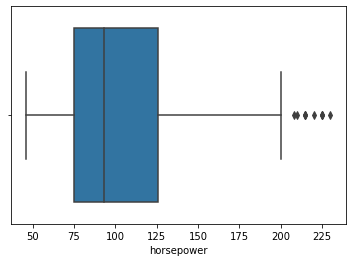

In [8]:
sns.boxplot(df['horsepower'])

In [9]:
##category distribution
df["cylinders"].value_counts()

4    204
8    103
6     84
3      4
5      3
Name: cylinders, dtype: int64

In [10]:
#Percentage of the cylinders
df["cylinders"].value_counts() / len(df)

4    0.512563
8    0.258794
6    0.211055
3    0.010050
5    0.007538
Name: cylinders, dtype: float64

In [11]:
df["origin"].value_counts()

1    249
3     79
2     70
Name: origin, dtype: int64

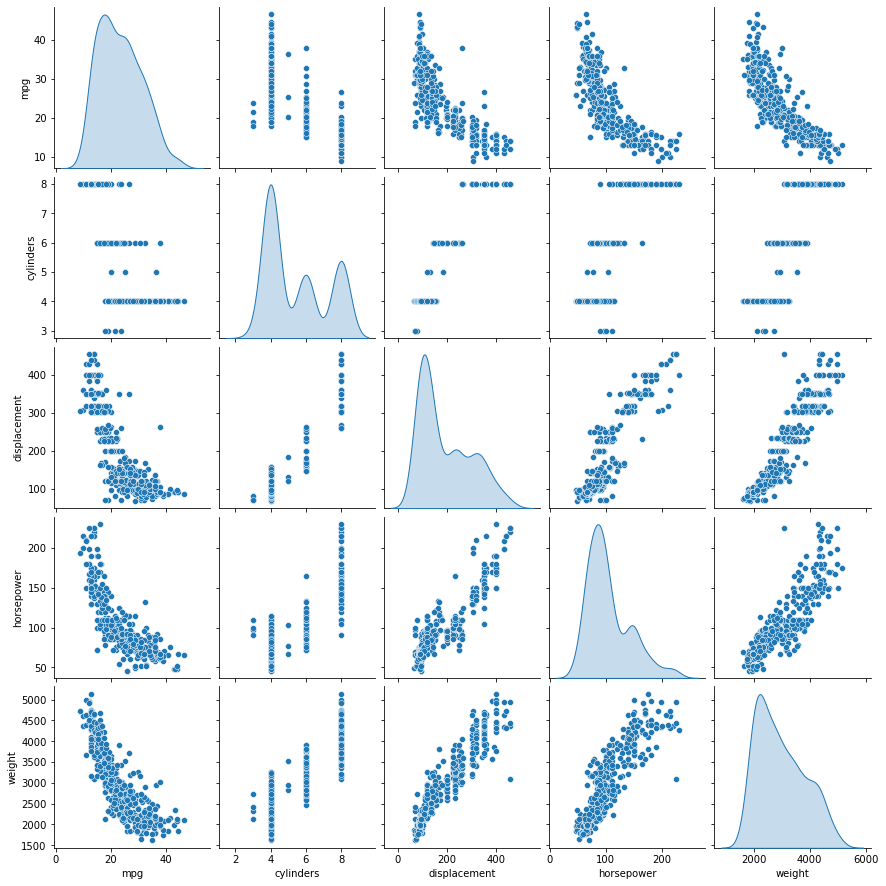

In [12]:
#pairplots to get an intuition of potential correlations
sns.pairplot(df[["mpg","cylinders","displacement","horsepower","weight"]], diag_kind="kde")

#### mpg has a negative relationship with "displacement","horsepower","weight"

In [13]:
from sklearn.model_selection import StratifiedShuffleSplit

In [14]:
split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
split.split(df, df["cylinders"])

<generator object BaseShuffleSplit.split at 0x000001B540780A50>

In [15]:
for train_index, test_index in split.split(df, df["cylinders"]):
    strat_train_set = df.loc[train_index]
    strat_test_set = df.loc[test_index]

In [16]:
strat_train_set

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin
145,32.0,4,83.0,61.0,2003.0,19.0,74,3
151,31.0,4,79.0,67.0,2000.0,16.0,74,2
388,26.0,4,156.0,92.0,2585.0,14.5,82,1
48,18.0,6,250.0,88.0,3139.0,14.5,71,1
114,26.0,4,98.0,90.0,2265.0,15.5,73,2
...,...,...,...,...,...,...,...,...
147,24.0,4,90.0,75.0,2108.0,15.5,74,2
156,16.0,8,400.0,170.0,4668.0,11.5,75,1
395,32.0,4,135.0,84.0,2295.0,11.6,82,1
14,24.0,4,113.0,95.0,2372.0,15.0,70,3


In [17]:
strat_test_set

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin
128,15.0,6,250.0,100.0,3336.0,17.0,74,1
100,18.0,6,250.0,88.0,3021.0,16.5,73,1
330,40.9,4,85.0,NaN,1835.0,17.3,80,2
57,24.0,4,113.0,95.0,2278.0,15.5,72,3
160,17.0,6,231.0,110.0,3907.0,21.0,75,1
...,...,...,...,...,...,...,...,...
266,30.0,4,98.0,68.0,2155.0,16.5,78,1
389,22.0,6,232.0,112.0,2835.0,14.7,82,1
217,30.0,4,111.0,80.0,2155.0,14.8,77,1
66,17.0,8,304.0,150.0,3672.0,11.5,72,1


In [18]:
#Segregate the target and feature variables
data = strat_train_set.drop("mpg", axis=1)
data_label = strat_train_set["mpg"].copy()
data

,cylinders,displacement,horsepower,weight,acceleration,model year,origin
145,4,83.0,61.0,2003.0,19.0,74,3
151,4,79.0,67.0,2000.0,16.0,74,2
388,4,156.0,92.0,2585.0,14.5,82,1
48,6,250.0,88.0,3139.0,14.5,71,1
114,4,98.0,90.0,2265.0,15.5,73,2
...,...,...,...,...,...,...,...
147,4,90.0,75.0,2108.0,15.5,74,2
156,8,400.0,170.0,4668.0,11.5,75,1
395,4,135.0,84.0,2295.0,11.6,82,1
14,4,113.0,95.0,2372.0,15.0,70,3


In [19]:
def preprocess_origin_col(df):
    df["origin"] = df["origin"].map({1: "India", 2: "USA", 3: "Germnay"})
    return df


In [20]:
data_country = preprocess_origin_col(data)
data_country

,cylinders,displacement,horsepower,weight,acceleration,model year,origin
145,4,83.0,61.0,2003.0,19.0,74,Germnay
151,4,79.0,67.0,2000.0,16.0,74,USA
388,4,156.0,92.0,2585.0,14.5,82,India
48,6,250.0,88.0,3139.0,14.5,71,India
114,4,98.0,90.0,2265.0,15.5,73,USA
...,...,...,...,...,...,...,...
147,4,90.0,75.0,2108.0,15.5,74,USA
156,8,400.0,170.0,4668.0,11.5,75,India
395,4,135.0,84.0,2295.0,11.6,82,India
14,4,113.0,95.0,2372.0,15.0,70,Germnay


In [21]:
data_country.columns

Index(['cylinders', 'displacement', 'horsepower', 'weight', 'acceleration',
       'model year', 'origin'],
      dtype='object')

#### Adding Attributes using BaseEstimator and Transformer

#### acceleration on power and acceleration on cylinder

In [22]:
from sklearn.base import BaseEstimator, TransformerMixin
#cylinder_index= 0, horsepower_index=2, acceleration_index= 4

class CustomAttrAdder(BaseEstimator, TransformerMixin):
    def __init__(self, acc_on_power= True):
        self.acc_on_power = acc_on_power
    def fit(self, X, y=None):
        return self #Nothing to do here
    def transform(self, X):
        acc_on_cyl = X[:,4]/ X[:,0]
        if self.acc_on_power:
            acc_on_power = X[:,4]/ X[:,2]
            return np.c_[X, acc_on_power,acc_on_cyl]
        return np.c_[X, acc_on_cyl]

#### Creating Pipeline

In [23]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer


##pipeline for numerical attributes
##imputing -> adding attributes -> scale them
def num_pipeline_transformer(data):
    
    '''
    Function to process numerical transformations
    Argument:
        data: original dataframe 
    Returns:
        num_attrs: numerical dataframe
        num_pipeline: numerical pipeline object
        
    '''
    num_attr = ['cylinders', 'displacement', 'horsepower', 'weight', 'acceleration','model year']
    
    num_pipeline = Pipeline([
        ("Impute", SimpleImputer(strategy="median")),
        ("Attr Added", CustomAttrAdder()),
        ("Scaling", StandardScaler()),
])
    return num_attr, num_pipeline


def full_pipeline_transformer(data):
    
    '''
    function to process the entire transformation for both numerical and categorical data
    Argument: 
        data: original dataframe 
    Returns:
        
    '''
    cat_attr = ["origin"]
    num_attr, num_pipeline = num_pipeline_transformer(data)
    full_pipeline = ColumnTransformer([
        ("num", num_pipeline, num_attr),
        ("cat", OneHotEncoder(), cat_attr),
])
    prepared_data = full_pipeline.fit_transform(data)
    return prepared_data

In [24]:
prepared_data = full_pipeline_transformer(data_country)
prepared_data[0]

array([-0.85657842, -1.07804475, -1.15192977, -1.17220298,  1.21586943,
       -0.54436373,  1.70952741,  1.29565517,  1.        ,  0.        ,
        0.        ])

### Selecting and Training Models
#### Linear Regression
#### Decision Tree
#### Random Forest
#### SVM regressor

In [25]:
from sklearn.linear_model import LinearRegression
lin_regr = LinearRegression()
lin_regr.fit(prepared_data,data_label)

LinearRegression()

In [26]:
#To test the prediction, prepare a test data
import numpy as np
test_X = strat_test_set.drop(["mpg"], axis=1)
test_y = strat_test_set["mpg"]

test_prepared_data = full_pipeline_transformer(test_X)
print(" Predicted data:", lin_regr.predict(test_prepared_data)[0:5])

 Predicted data: [20.05375289 21.61072025 28.60886943 22.84164324 16.45994681]


In [27]:
print("Actual Data:",test_y[0:5])

Actual Data: 128    15.0
100    18.0
330    40.9
57     24.0
160    17.0
Name: mpg, dtype: float64


#### To find the difference between actual and predicted values

#### for Regression problems, we use RMSE Root MEan Square Error

In [28]:
from sklearn.metrics import mean_squared_error
lr_prediction = lin_regr.predict(prepared_data)
lin_mse = mean_squared_error(data_label, lr_prediction)
lin_rmse = np.sqrt(lin_mse)
lin_rmse

2.9590402225760872

#### Decision Tree

In [29]:
from sklearn.tree import DecisionTreeRegressor

dtr = DecisionTreeRegressor()
dtr.fit(prepared_data,data_label)
dtr_prediction = dtr.predict(prepared_data)
dtr_mse = mean_squared_error(data_label, dtr_prediction)
dtr_rmse = np.sqrt(dtr_mse)
dtr_rmse

0.0

 But no model is perfect, 
 this means that our model has overfit the data to a great extent.
Means it is performing well on the train data n poor on the test data
We won't be touching out test data until we finalize our model.

#### K fold Cross Validation

Scikit-Learn’s K-fold cross-validation feature randomly splits the training set into K distinct subsets called folds, 
then it trains and evaluates the model K times, 
picking a different fold for evaluation every time and training on the other K-1 folds.

In [31]:
#### K fold Cross Validation Method with 10 folds For Decision Tree Regression
from sklearn.model_selection import cross_val_score

dtr_cv_score = cross_val_score(dtr, prepared_data, data_label, cv= 10, scoring="neg_mean_squared_error")
dtr_cv_rmse= np.sqrt(-dtr_cv_score)
dtr_cv_rmse

array([2.99864553, 2.97431715, 2.9099506 , 3.30364382, 2.65941723,
       3.06308668, 3.50704648, 3.72785126, 4.21104538, 2.76627151])

In [32]:
dtr_cv_rmse.mean()

3.2121275635974826

In [33]:
#### K fold Cross Validation Method with 10 folds For linear Regression
lin_regr_cv_score = cross_val_score(lin_regr, prepared_data, data_label, cv=10, scoring="neg_mean_squared_error")
lin_regr_cv_rmse = np.sqrt(-lin_regr_cv_score)
lin_regr_cv_rmse

array([3.43254597, 3.45157629, 3.6621715 , 2.59652976, 2.48023405,
       2.74798115, 3.32524647, 2.42208917, 3.78133275, 2.8573747 ])

In [34]:
lin_regr_cv_rmse.mean()

3.0757081793709324

Linear regression mean is less than Decision Tress

So, Linear Regression Has performd better than Decision Tree

#### Random Forest Model

In [35]:
from sklearn.ensemble import RandomForestRegressor
rfr = RandomForestRegressor()
rfr.fit(prepared_data, data_label)
rfr_cv = cross_val_score(rfr, prepared_data, data_label, cv=10, scoring="neg_mean_squared_error")
rfr_rmse = np.sqrt(-rfr_cv)
rfr_rmse

array([2.27354042, 2.55834681, 2.74945555, 2.4498247 , 2.00993613,
       2.57262594, 2.67672828, 2.70729535, 4.1351253 , 1.92488791])

In [36]:
rfr_rmse.mean()

2.605776640708437

Random Forest mean is less than Linear regression and  Decision Tress

So, Random Forest Has performd better than Linear Regression and  Decision Tree

#### Support Vector Regressor

In [37]:
from sklearn.svm import SVR
svr = SVR(kernel= "linear")
svr.fit(prepared_data, data_label)
svr_cv = cross_val_score(svr, prepared_data,data_label, cv=10, scoring="neg_mean_squared_error")
svr_rmse = np.sqrt(-svr_cv)
svr_rmse

array([3.52759194, 3.10435954, 3.6573445 , 2.83823604, 2.56665123,
       2.68448844, 3.4378112 , 2.34802163, 3.85665021, 2.84476148])

In [38]:
svr_rmse.mean()

3.08659162080283

Support Vector Regressor mean is more than Random Forest Regressor.

So, Random Forest regressor Has performd better than all the three model.

Hence, well perform Hyper Parameter tuning On Random Forest Regressor.

#### Hyperparameter Tuning using GridSearchCV

In [39]:
from sklearn.model_selection import GridSearchCV

param_grid = [
    {"n_estimators" : [3,10,30], "max_features" : [2,4,6,8]},
    {"bootstrap" : [False], "n_estimators" : [3,10], "max_features" : [2,3,4]}
]

grid_search = GridSearchCV(rfr, param_grid, cv=10, scoring="neg_mean_squared_error", return_train_score = True )
grid_search.fit(prepared_data, data_label)

GridSearchCV(cv=10, estimator=RandomForestRegressor(),
             param_grid=[{'max_features': [2, 4, 6, 8],
                          'n_estimators': [3, 10, 30]},
                         {'bootstrap': [False], 'max_features': [2, 3, 4],
                          'n_estimators': [3, 10]}],
             return_train_score=True, scoring='neg_mean_squared_error')

In [40]:
grid_search.best_params_

{'max_features': 8, 'n_estimators': 30}

In [41]:
train_rmse= np.sqrt(-grid_search.best_score_)
train_rmse

2.647726097809835

In [42]:
cv_results = grid_search.cv_results_

for mean_test_score, params in zip(cv_results["mean_test_score"], cv_results["params"] ):
    print(np.sqrt(-mean_test_score), params)

3.651698860789656 {'max_features': 2, 'n_estimators': 3}
3.0876143567041865 {'max_features': 2, 'n_estimators': 10}
2.8474667072233726 {'max_features': 2, 'n_estimators': 30}
3.04072947338081 {'max_features': 4, 'n_estimators': 3}
2.825414967381468 {'max_features': 4, 'n_estimators': 10}
2.7413067644205213 {'max_features': 4, 'n_estimators': 30}
3.3778326092630335 {'max_features': 6, 'n_estimators': 3}
2.859935405598096 {'max_features': 6, 'n_estimators': 10}
2.674751992489428 {'max_features': 6, 'n_estimators': 30}
2.9834453634278506 {'max_features': 8, 'n_estimators': 3}
2.7746593767989007 {'max_features': 8, 'n_estimators': 10}
2.647726097809835 {'max_features': 8, 'n_estimators': 30}
3.1583549131103767 {'bootstrap': False, 'max_features': 2, 'n_estimators': 3}
2.9196854393095375 {'bootstrap': False, 'max_features': 2, 'n_estimators': 10}
3.0906383785421356 {'bootstrap': False, 'max_features': 3, 'n_estimators': 3}
2.9321862921057558 {'bootstrap': False, 'max_features': 3, 'n_estima

In [43]:
best_estimator = grid_search.best_estimator_
best_estimator

RandomForestRegressor(max_features=8, n_estimators=30)

In [44]:
#feature importance
feature_importance = grid_search.best_estimator_.feature_importances_
feature_importance

array([0.07759203, 0.4219295 , 0.12461011, 0.17059871, 0.0143811 ,
       0.12527367, 0.02415238, 0.036314  , 0.00196232, 0.00121799,
       0.00196819])

In [45]:
extra_attr = ["acc_on_power", "acc_on_cyl"]
num_attr = ['cylinders', 'displacement', 'horsepower', 'weight', 'acceleration','model year']

attr =  num_attr + extra_attr
sorted(zip(attr, feature_importance), reverse=True)

[('weight', 0.17059870685511636),
 ('model year', 0.12527367036673712),
 ('horsepower', 0.12461011201325797),
 ('displacement', 0.42192949922355993),
 ('cylinders', 0.07759202731027245),
 ('acceleration', 0.014381101455164063),
 ('acc_on_power', 0.024152384963643938),
 ('acc_on_cyl', 0.03631400285680491)]

Weight is the most important parameter

#### Evaluating the entire system on Test Data

In [46]:
test_X = strat_test_set.drop(["mpg"], axis=1)
test_y = strat_test_set["mpg"]
test_X_preprocessed_data = preprocess_origin_col(test_X)
test_X_prepared_data = full_pipeline_transformer(test_X_preprocessed_data)

test_prediction = best_estimator.predict(test_X_prepared_data)
test_mse = mean_squared_error(test_y, test_prediction)
test_rmse = np.sqrt(test_mse)
test_rmse

3.031784105293634

In [47]:
train_rmse

2.647726097809835

#### Creating a function to cover this entire flow

In [48]:
def predict_mpg(config, best_estimator):
    
    if type(config) == dict:
        df = pd.DataFrame(config)
    else:
        df = config
    
    preproc_df = preprocess_origin_col(df)
    prepared_df = full_pipeline_transformer(preproc_df)
    y_pred = best_estimator.predict(prepared_df)
    return y_pred

In [49]:

##checking it on a random sample
vehicle_config = {
    'cylinders': [4, 6, 8],
    'displacement': [155.0, 160.0, 165.5],
    'horsepower': [93.0, 130.0, 98.0],
    'weight': [2500.0, 3150.0, 2600.0],
    'acceleration': [15.0, 14.0, 16.0],
    'model year': [81, 80, 78],
    'origin': [3, 2, 1]
}

predict_mpg(vehicle_config, best_estimator)

array([33.79333333, 16.36      , 22.75333333])

#### Save the Model

In [50]:
import pickle


In [51]:
#Saving the model
with open("model.bin","wb") as f_out:
    pickle.dump(best_estimator, f_out)
    f_out.close()   

In [52]:
#Load the model from the saved file
with open("model.bin", "rb") as f_in:
    model = pickle.load(f_in)
predict_mpg(vehicle_config, model)

array([33.79333333, 16.36      , 22.75333333])